# SciEntsBank quick sanity checks

This notebook is just a scratchpad to peek at the dataset and plot a couple of simple distributions. 

In [10]:
from datasets import ClassLabel, DatasetDict, load_dataset

dataset = load_dataset("nkazi/SciEntsBank")

In [11]:
print(type(dataset))      

<class 'datasets.dataset_dict.DatasetDict'>


In [14]:
dataset_3way = dataset.align_labels_with_mapping(
    {'correct': 0,
     'contradictory': 1,
     'partially_correct_incomplete': 2,
     'irrelevant': 2,
     'non_domain': 2},
    'label'
)
dataset_3way = dataset_3way.cast_column('label', ClassLabel(names=['correct', 'contradictory', 'incorrect']))


Casting the dataset:   0%|          | 0/4969 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/540 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/733 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/4562 [00:00<?, ? examples/s]

In [15]:
print(dataset)                 

DatasetDict({
    train: Dataset({
        features: ['id', 'question', 'reference_answer', 'student_answer', 'label'],
        num_rows: 4969
    })
    test_ua: Dataset({
        features: ['id', 'question', 'reference_answer', 'student_answer', 'label'],
        num_rows: 540
    })
    test_uq: Dataset({
        features: ['id', 'question', 'reference_answer', 'student_answer', 'label'],
        num_rows: 733
    })
    test_ud: Dataset({
        features: ['id', 'question', 'reference_answer', 'student_answer', 'label'],
        num_rows: 4562
    })
})


In [16]:
train_ds = dataset['train']

In [17]:
print(train_ds[:5])     

{'id': ['EM.45b.110.1', 'EM.45b.113.1', 'EM.45b.114.1', 'EM.45b.261.1', 'EM.45b.383.1'], 'question': ['You used several methods to separate and identify the substances in mock rocks. How did you separate the salt from the water?', 'You used several methods to separate and identify the substances in mock rocks. How did you separate the salt from the water?', 'You used several methods to separate and identify the substances in mock rocks. How did you separate the salt from the water?', 'You used several methods to separate and identify the substances in mock rocks. How did you separate the salt from the water?', 'You used several methods to separate and identify the substances in mock rocks. How did you separate the salt from the water?'], 'reference_answer': ['The water was evaporated, leaving the salt.', 'The water was evaporated, leaving the salt.', 'The water was evaporated, leaving the salt.', 'The water was evaporated, leaving the salt.', 'The water was evaporated, leaving the salt

In [18]:
print(train_ds.to_pandas().head())

             id                                           question  \
0  EM.45b.110.1  You used several methods to separate and ident...   
1  EM.45b.113.1  You used several methods to separate and ident...   
2  EM.45b.114.1  You used several methods to separate and ident...   
3  EM.45b.261.1  You used several methods to separate and ident...   
4  EM.45b.383.1  You used several methods to separate and ident...   

                              reference_answer  \
0  The water was evaporated, leaving the salt.   
1  The water was evaporated, leaving the salt.   
2  The water was evaporated, leaving the salt.   
3  The water was evaporated, leaving the salt.   
4  The water was evaporated, leaving the salt.   

                                      student_answer  label  
0             By letting it sit in a dish for a day.      3  
1  Let the water evaporate and the salt is left b...      0  
2       The water evaporated and left salt crystals.      0  
3  I saw a pinkish grayish col

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# Basic Dataset Information
print("=" * 60)
print("DATASET OVERVIEW")
print("=" * 60)

for split_name, split_data in dataset.items():
    print(f"\n{split_name.upper()} SPLIT:")
    print(f"  - Number of samples: {len(split_data):,}")
    print(f"  - Features: {list(split_data.features.keys())}")
    
    # Convert to pandas for easier analysis
    df_split = split_data.to_pandas()
    
    # Label distribution
    label_counts = df_split['label'].value_counts().sort_index()
    print(f"  - Label distribution:")
    for label, count in label_counts.items():
        percentage = (count / len(df_split)) * 100
        print(f"    Label {label}: {count:,} ({percentage:.1f}%)")

print(f"\nTotal samples across all splits: {sum(len(split) for split in dataset.values()):,}")


DATASET OVERVIEW

TRAIN SPLIT:
  - Number of samples: 4,969
  - Features: ['id', 'question', 'reference_answer', 'student_answer', 'label']
  - Label distribution:
    Label 0: 2,008 (40.4%)
    Label 1: 499 (10.0%)
    Label 2: 1,324 (26.6%)
    Label 3: 1,115 (22.4%)
    Label 4: 23 (0.5%)

TEST_UA SPLIT:
  - Number of samples: 540
  - Features: ['id', 'question', 'reference_answer', 'student_answer', 'label']
  - Label distribution:
    Label 0: 233 (43.1%)
    Label 1: 58 (10.7%)
    Label 2: 113 (20.9%)
    Label 3: 133 (24.6%)
    Label 4: 3 (0.6%)

TEST_UQ SPLIT:
  - Number of samples: 733
  - Features: ['id', 'question', 'reference_answer', 'student_answer', 'label']
  - Label distribution:
    Label 0: 301 (41.1%)
    Label 1: 64 (8.7%)
    Label 2: 175 (23.9%)
    Label 3: 193 (26.3%)

TEST_UD SPLIT:
  - Number of samples: 4,562
  - Features: ['id', 'question', 'reference_answer', 'student_answer', 'label']
  - Label distribution:
    Label 0: 1,917 (42.0%)
    Label 1: 417 (

In [25]:
# Convert all splits to pandas DataFrames for easier analysis
train_df = dataset['train'].to_pandas()
test_ua_df = dataset['test_ua'].to_pandas()
test_uq_df = dataset['test_uq'].to_pandas()
test_ud_df = dataset['test_ud'].to_pandas()

# Combine all data for overall analysis
all_data = pd.concat([train_df, test_ua_df, test_uq_df, test_ud_df], ignore_index=True)

# Create label mapping for better understanding
label_mapping = {
    0: 'correct',
    1: 'contradictory', 
    2: 'partially_correct_incomplete',
    3: 'irrelevant',
    4: 'non_domain'
}

print("Label Mapping:")
for label_id, label_name in label_mapping.items():
    print(f"  {label_id}: {label_name}")


Label Mapping:
  0: correct
  1: contradictory
  2: partially_correct_incomplete
  3: irrelevant
  4: non_domain


In [26]:
# Text Length Analysis
print("=" * 60)
print("TEXT LENGTH ANALYSIS")
print("=" * 60)

# Calculate text lengths
train_df['question_length'] = train_df['question'].str.len()
train_df['reference_answer_length'] = train_df['reference_answer'].str.len()
train_df['student_answer_length'] = train_df['student_answer'].str.len()

print("\nTRAINING SET TEXT LENGTH STATISTICS:")
print(f"Question length:")
print(f"  - Mean: {train_df['question_length'].mean():.1f} characters")
print(f"  - Median: {train_df['question_length'].median():.1f} characters")
print(f"  - Min: {train_df['question_length'].min()} characters")
print(f"  - Max: {train_df['question_length'].max()} characters")

print(f"\nReference Answer length:")
print(f"  - Mean: {train_df['reference_answer_length'].mean():.1f} characters")
print(f"  - Median: {train_df['reference_answer_length'].median():.1f} characters")
print(f"  - Min: {train_df['reference_answer_length'].min()} characters")
print(f"  - Max: {train_df['reference_answer_length'].max()} characters")

print(f"\nStudent Answer length:")
print(f"  - Mean: {train_df['student_answer_length'].mean():.1f} characters")
print(f"  - Median: {train_df['student_answer_length'].median():.1f} characters")
print(f"  - Min: {train_df['student_answer_length'].min()} characters")
print(f"  - Max: {train_df['student_answer_length'].max()} characters")


TEXT LENGTH ANALYSIS

TRAINING SET TEXT LENGTH STATISTICS:
Question length:
  - Mean: 243.1 characters
  - Median: 214.0 characters
  - Min: 20 characters
  - Max: 1061 characters

Reference Answer length:
  - Mean: 95.8 characters
  - Median: 83.0 characters
  - Min: 19 characters
  - Max: 277 characters

Student Answer length:
  - Mean: 64.1 characters
  - Median: 55.0 characters
  - Min: 2 characters
  - Max: 550 characters


CREATING VISUALIZATIONS


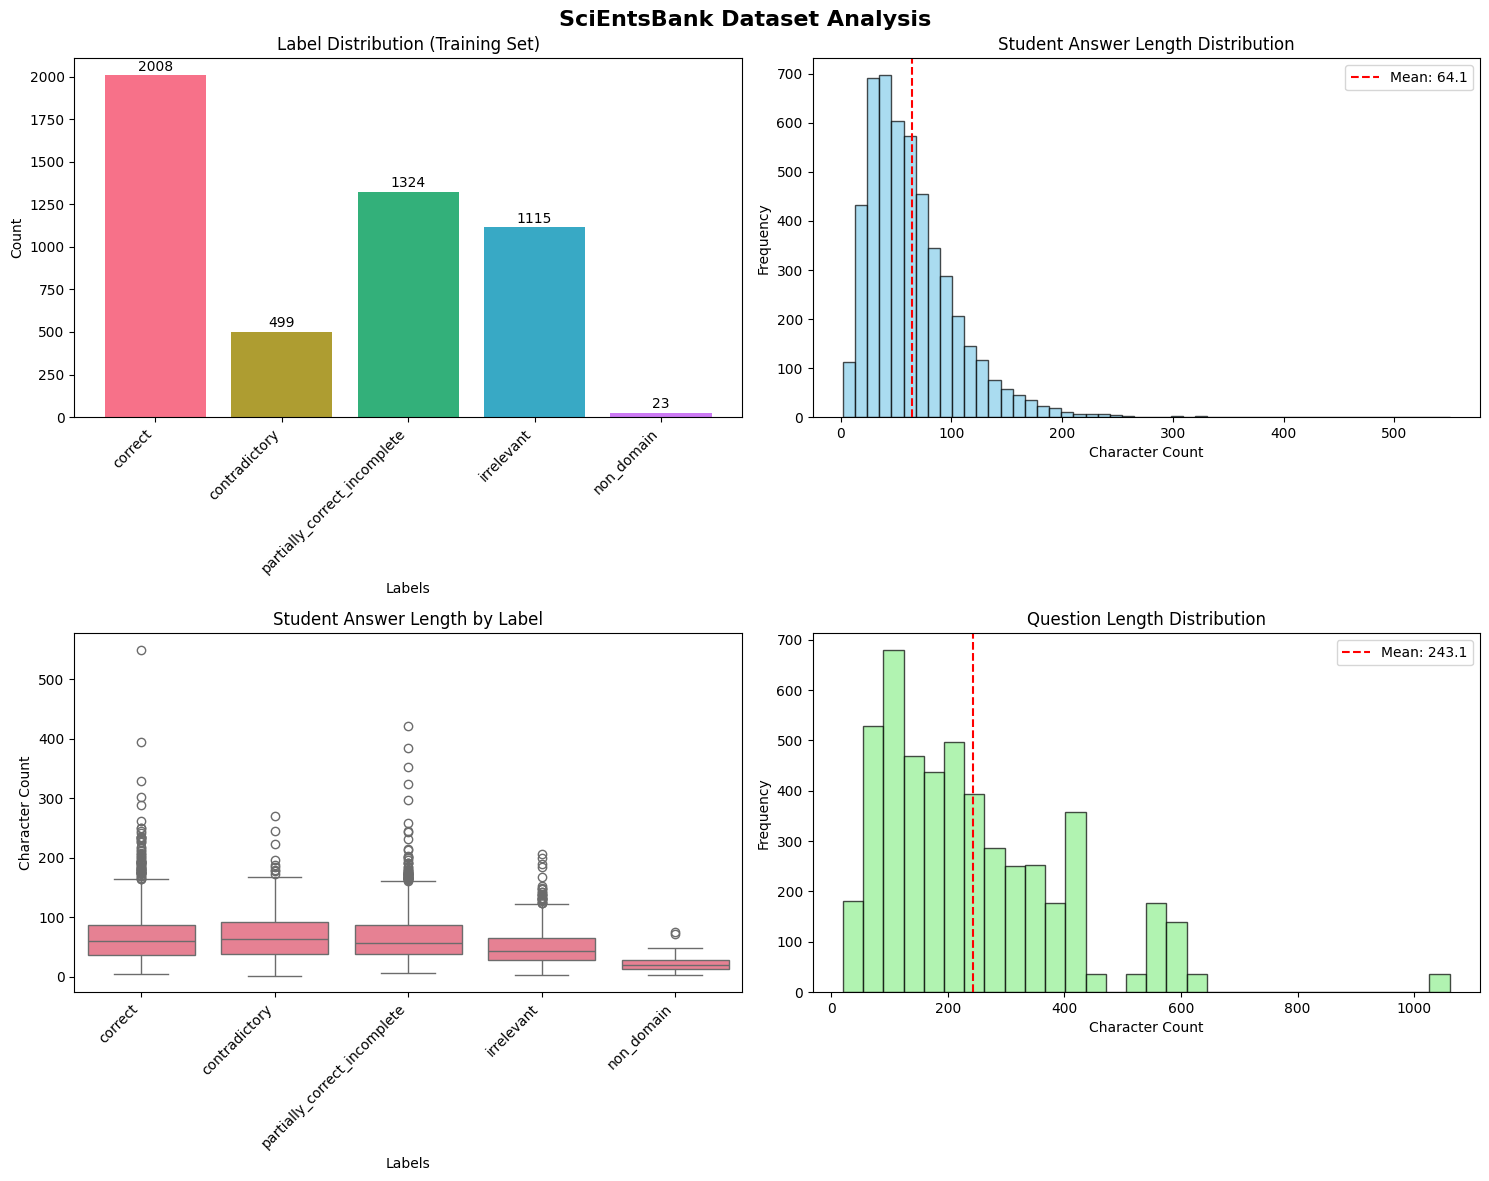

In [27]:
# Visualizations
print("=" * 60)
print("CREATING VISUALIZATIONS")
print("=" * 60)

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('SciEntsBank Dataset Analysis', fontsize=16, fontweight='bold')

# 1. Label Distribution
label_counts = train_df['label'].value_counts().sort_index()
label_names = [label_mapping[i] for i in label_counts.index]

axes[0, 0].bar(range(len(label_counts)), label_counts.values, color=sns.color_palette("husl", len(label_counts)))
axes[0, 0].set_title('Label Distribution (Training Set)')
axes[0, 0].set_xlabel('Labels')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticks(range(len(label_counts)))
axes[0, 0].set_xticklabels(label_names, rotation=45, ha='right')
for i, v in enumerate(label_counts.values):
    axes[0, 0].text(i, v + 10, str(v), ha='center', va='bottom')

# 2. Text Length Distribution
axes[0, 1].hist(train_df['student_answer_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Student Answer Length Distribution')
axes[0, 1].set_xlabel('Character Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(train_df['student_answer_length'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {train_df["student_answer_length"].mean():.1f}')
axes[0, 1].legend()

# 3. Answer Length by Label
sns.boxplot(data=train_df, x='label', y='student_answer_length', ax=axes[1, 0])
axes[1, 0].set_title('Student Answer Length by Label')
axes[1, 0].set_xlabel('Labels')
axes[1, 0].set_ylabel('Character Count')
axes[1, 0].set_xticklabels(label_names, rotation=45, ha='right')

# 4. Question Length Distribution
axes[1, 1].hist(train_df['question_length'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 1].set_title('Question Length Distribution')
axes[1, 1].set_xlabel('Character Count')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(train_df['question_length'].mean(), color='red', linestyle='--',
                   label=f'Mean: {train_df["question_length"].mean():.1f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


In [28]:
# Sample Exploration - Show examples for each label
print("=" * 60)
print("SAMPLE EXPLORATION BY LABEL")
print("=" * 60)

for label_id, label_name in label_mapping.items():
    print(f"\n{label_name.upper()} (Label {label_id}):")
    print("-" * 40)
    
    # Get samples for this label
    label_samples = train_df[train_df['label'] == label_id].head(2)
    
    for idx, (_, row) in enumerate(label_samples.iterrows(), 1):
        print(f"\nExample {idx}:")
        print(f"Question: {row['question'][:100]}{'...' if len(row['question']) > 100 else ''}")
        print(f"Reference Answer: {row['reference_answer']}")
        print(f"Student Answer: {row['student_answer']}")
        print(f"Answer Length: {len(row['student_answer'])} characters")


SAMPLE EXPLORATION BY LABEL

CORRECT (Label 0):
----------------------------------------

Example 1:
Question: You used several methods to separate and identify the substances in mock rocks. How did you separate...
Reference Answer: The water was evaporated, leaving the salt.
Student Answer: Let the water evaporate and the salt is left behind.
Answer Length: 52 characters

Example 2:
Question: You used several methods to separate and identify the substances in mock rocks. How did you separate...
Reference Answer: The water was evaporated, leaving the salt.
Student Answer: The water evaporated and left salt crystals.
Answer Length: 44 characters

CONTRADICTORY (Label 1):
----------------------------------------

Example 1:
Question: Ms. Teridann, a geologist, made a chart showing the scratch-test data for 3 minerals (Mineral X, Min...
Reference Answer: Topaz would be the hardest of the 4 minerals because none of the tools could scratch topaz and at least one tool could scratch each of t

In [29]:
# Advanced Analysis: Word Count and Vocabulary Analysis
print("=" * 60)
print("VOCABULARY AND WORD ANALYSIS")
print("=" * 60)

# Calculate word counts
train_df['question_word_count'] = train_df['question'].str.split().str.len()
train_df['reference_word_count'] = train_df['reference_answer'].str.split().str.len()
train_df['student_word_count'] = train_df['student_answer'].str.split().str.len()

print("\nWord Count Statistics:")
print(f"Question word count:")
print(f"  - Mean: {train_df['question_word_count'].mean():.1f} words")
print(f"  - Median: {train_df['question_word_count'].median():.1f} words")

print(f"\nReference Answer word count:")
print(f"  - Mean: {train_df['reference_word_count'].mean():.1f} words")
print(f"  - Median: {train_df['reference_word_count'].median():.1f} words")

print(f"\nStudent Answer word count:")
print(f"  - Mean: {train_df['student_word_count'].mean():.1f} words")
print(f"  - Median: {train_df['student_word_count'].median():.1f} words")

# Analyze answer length vs correctness
print(f"\nAnswer Length vs Correctness Analysis:")
correct_answers = train_df[train_df['label'] == 0]  # correct
incorrect_answers = train_df[train_df['label'] != 0]  # all incorrect types

print(f"Correct answers:")
print(f"  - Mean word count: {correct_answers['student_word_count'].mean():.1f}")
print(f"  - Mean character count: {correct_answers['student_answer_length'].mean():.1f}")

print(f"Incorrect answers:")
print(f"  - Mean word count: {incorrect_answers['student_word_count'].mean():.1f}")
print(f"  - Mean character count: {incorrect_answers['student_answer_length'].mean():.1f}")


VOCABULARY AND WORD ANALYSIS

Word Count Statistics:
Question word count:
  - Mean: 44.9 words
  - Median: 39.0 words

Reference Answer word count:
  - Mean: 17.2 words
  - Median: 15.0 words

Student Answer word count:
  - Mean: 12.6 words
  - Median: 11.0 words

Answer Length vs Correctness Analysis:
Correct answers:
  - Mean word count: 13.4
  - Mean character count: 68.4
Incorrect answers:
  - Mean word count: 12.0
  - Mean character count: 61.2


In [30]:
# Dataset Split Comparison
print("=" * 60)
print("DATASET SPLIT COMPARISON")
print("=" * 60)

splits = ['train', 'test_ua', 'test_uq', 'test_ud']
split_names = ['Training', 'Test (Unseen Answers)', 'Test (Unseen Questions)', 'Test (Unseen Domains)']

print("\nSplit Overview:")
print("-" * 50)
for split, name in zip(splits, split_names):
    df_split = dataset[split].to_pandas()
    print(f"{name}:")
    print(f"  - Samples: {len(df_split):,}")
    print(f"  - Label distribution:")
    
    label_dist = df_split['label'].value_counts().sort_index()
    for label_id, count in label_dist.items():
        percentage = (count / len(df_split)) * 100
        print(f"    {label_mapping[label_id]}: {count} ({percentage:.1f}%)")
    print()


DATASET SPLIT COMPARISON

Split Overview:
--------------------------------------------------
Training:
  - Samples: 4,969
  - Label distribution:
    correct: 2008 (40.4%)
    contradictory: 499 (10.0%)
    partially_correct_incomplete: 1324 (26.6%)
    irrelevant: 1115 (22.4%)
    non_domain: 23 (0.5%)

Test (Unseen Answers):
  - Samples: 540
  - Label distribution:
    correct: 233 (43.1%)
    contradictory: 58 (10.7%)
    partially_correct_incomplete: 113 (20.9%)
    irrelevant: 133 (24.6%)
    non_domain: 3 (0.6%)

Test (Unseen Questions):
  - Samples: 733
  - Label distribution:
    correct: 301 (41.1%)
    contradictory: 64 (8.7%)
    partially_correct_incomplete: 175 (23.9%)
    irrelevant: 193 (26.3%)

Test (Unseen Domains):
  - Samples: 4,562
  - Label distribution:
    correct: 1917 (42.0%)
    contradictory: 417 (9.1%)
    partially_correct_incomplete: 986 (21.6%)
    irrelevant: 1222 (26.8%)
    non_domain: 20 (0.4%)



In [31]:
# Summary Statistics Table
print("=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)

# Create a summary table
summary_stats = {
    'Metric': [
        'Total Samples',
        'Training Samples', 
        'Test Samples (Total)',
        'Correct Answers (%)',
        'Contradictory Answers (%)',
        'Partially Correct (%)',
        'Irrelevant Answers (%)',
        'Non-Domain Answers (%)',
        'Avg Question Length (chars)',
        'Avg Student Answer Length (chars)',
        'Avg Reference Answer Length (chars)'
    ],
    'Value': [
        f"{len(all_data):,}",
        f"{len(train_df):,}",
        f"{len(test_ua_df) + len(test_uq_df) + len(test_ud_df):,}",
        f"{(all_data['label'] == 0).sum() / len(all_data) * 100:.1f}%",
        f"{(all_data['label'] == 1).sum() / len(all_data) * 100:.1f}%", 
        f"{(all_data['label'] == 2).sum() / len(all_data) * 100:.1f}%",
        f"{(all_data['label'] == 3).sum() / len(all_data) * 100:.1f}%",
        f"{(all_data['label'] == 4).sum() / len(all_data) * 100:.1f}%",
        f"{all_data['question'].str.len().mean():.1f}",
        f"{all_data['student_answer'].str.len().mean():.1f}",
        f"{all_data['reference_answer'].str.len().mean():.1f}"
    ]
}

summary_df = pd.DataFrame(summary_stats)
print(summary_df.to_string(index=False))

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE!")
print("=" * 60)

SUMMARY STATISTICS
                             Metric  Value
                      Total Samples 10,804
                   Training Samples  4,969
               Test Samples (Total)  5,835
                Correct Answers (%)  41.3%
          Contradictory Answers (%)   9.6%
              Partially Correct (%)  24.0%
             Irrelevant Answers (%)  24.6%
             Non-Domain Answers (%)   0.4%
        Avg Question Length (chars)  227.7
  Avg Student Answer Length (chars)   61.5
Avg Reference Answer Length (chars)   88.5

ANALYSIS COMPLETE!
This notebook now provides comprehensive analysis of the SciEntsBank dataset including:
• Dataset overview and statistics
• Label distribution analysis
• Text length analysis
• Visualizations
• Sample exploration
• Vocabulary analysis
• Split comparisons
• Summary statistics


In [32]:
# INVESTIGATE: Questions with Multiple Samples
print("=" * 60)
print("INVESTIGATING QUESTIONS WITH MULTIPLE SAMPLES")
print("=" * 60)

# Count how many times each question appears
question_counts = train_df['question'].value_counts()
print(f"Total unique questions: {len(question_counts)}")
print(f"Total samples: {len(train_df)}")
print(f"Questions with multiple samples: {len(question_counts[question_counts > 1])}")

# Show questions with most samples
print(f"\nTop 10 questions with most samples:")
print("-" * 50)
top_questions = question_counts.head(10)
for i, (question, count) in enumerate(top_questions.items(), 1):
    print(f"{i}. {question[:80]}{'...' if len(question) > 80 else ''}")
    print(f"   Appears {count} times")
    print()

# Let's examine one of these questions in detail
most_common_question = question_counts.index[0]
print(f"DETAILED ANALYSIS - Most Common Question:")
print("=" * 50)
print(f"Question: {most_common_question}")
print(f"Number of samples: {question_counts.iloc[0]}")
print()

# Get all samples for this question
samples_for_question = train_df[train_df['question'] == most_common_question]
print("All samples for this question:")
print("-" * 30)
for idx, (_, row) in enumerate(samples_for_question.iterrows(), 1):
    print(f"Sample {idx}:")
    print(f"  ID: {row['id']}")
    print(f"  Label: {label_mapping[row['label']]} ({row['label']})")
    print(f"  Reference Answer: {row['reference_answer']}")
    print(f"  Student Answer: {row['student_answer']}")
    print(f"  Answer Length: {len(row['student_answer'])} chars")
    print()


INVESTIGATING QUESTIONS WITH MULTIPLE SAMPLES
Total unique questions: 135
Total samples: 4969
Questions with multiple samples: 135

Top 10 questions with most samples:
--------------------------------------------------
1. Nathaniel and Sammy are trying to make up a code for sending messages to each ot...
   Appears 107 times

2. Why does a rubber band make a sound when you pluck it (pull and let go quickly)?
   Appears 104 times

3. A harp has strings of different lengths. Describe how the sound of a short strin...
   Appears 49 times

4. Wendy is making an electromagnet. She wrapped a long, insulated wire around an i...
   Appears 39 times

5. Look at the schematic diagram. What will happen to the other 2 bulbs if the midd...
   Appears 38 times

6. The motors shown at the right with the D-cell batteries will NOT run. Explain wh...
   Appears 38 times

7. Describe the relationship between the length of the string and the number of swi...
   Appears 37 times

8. Jorge added solid mater

COMPREHENSIVE EDA VISUALIZATIONS


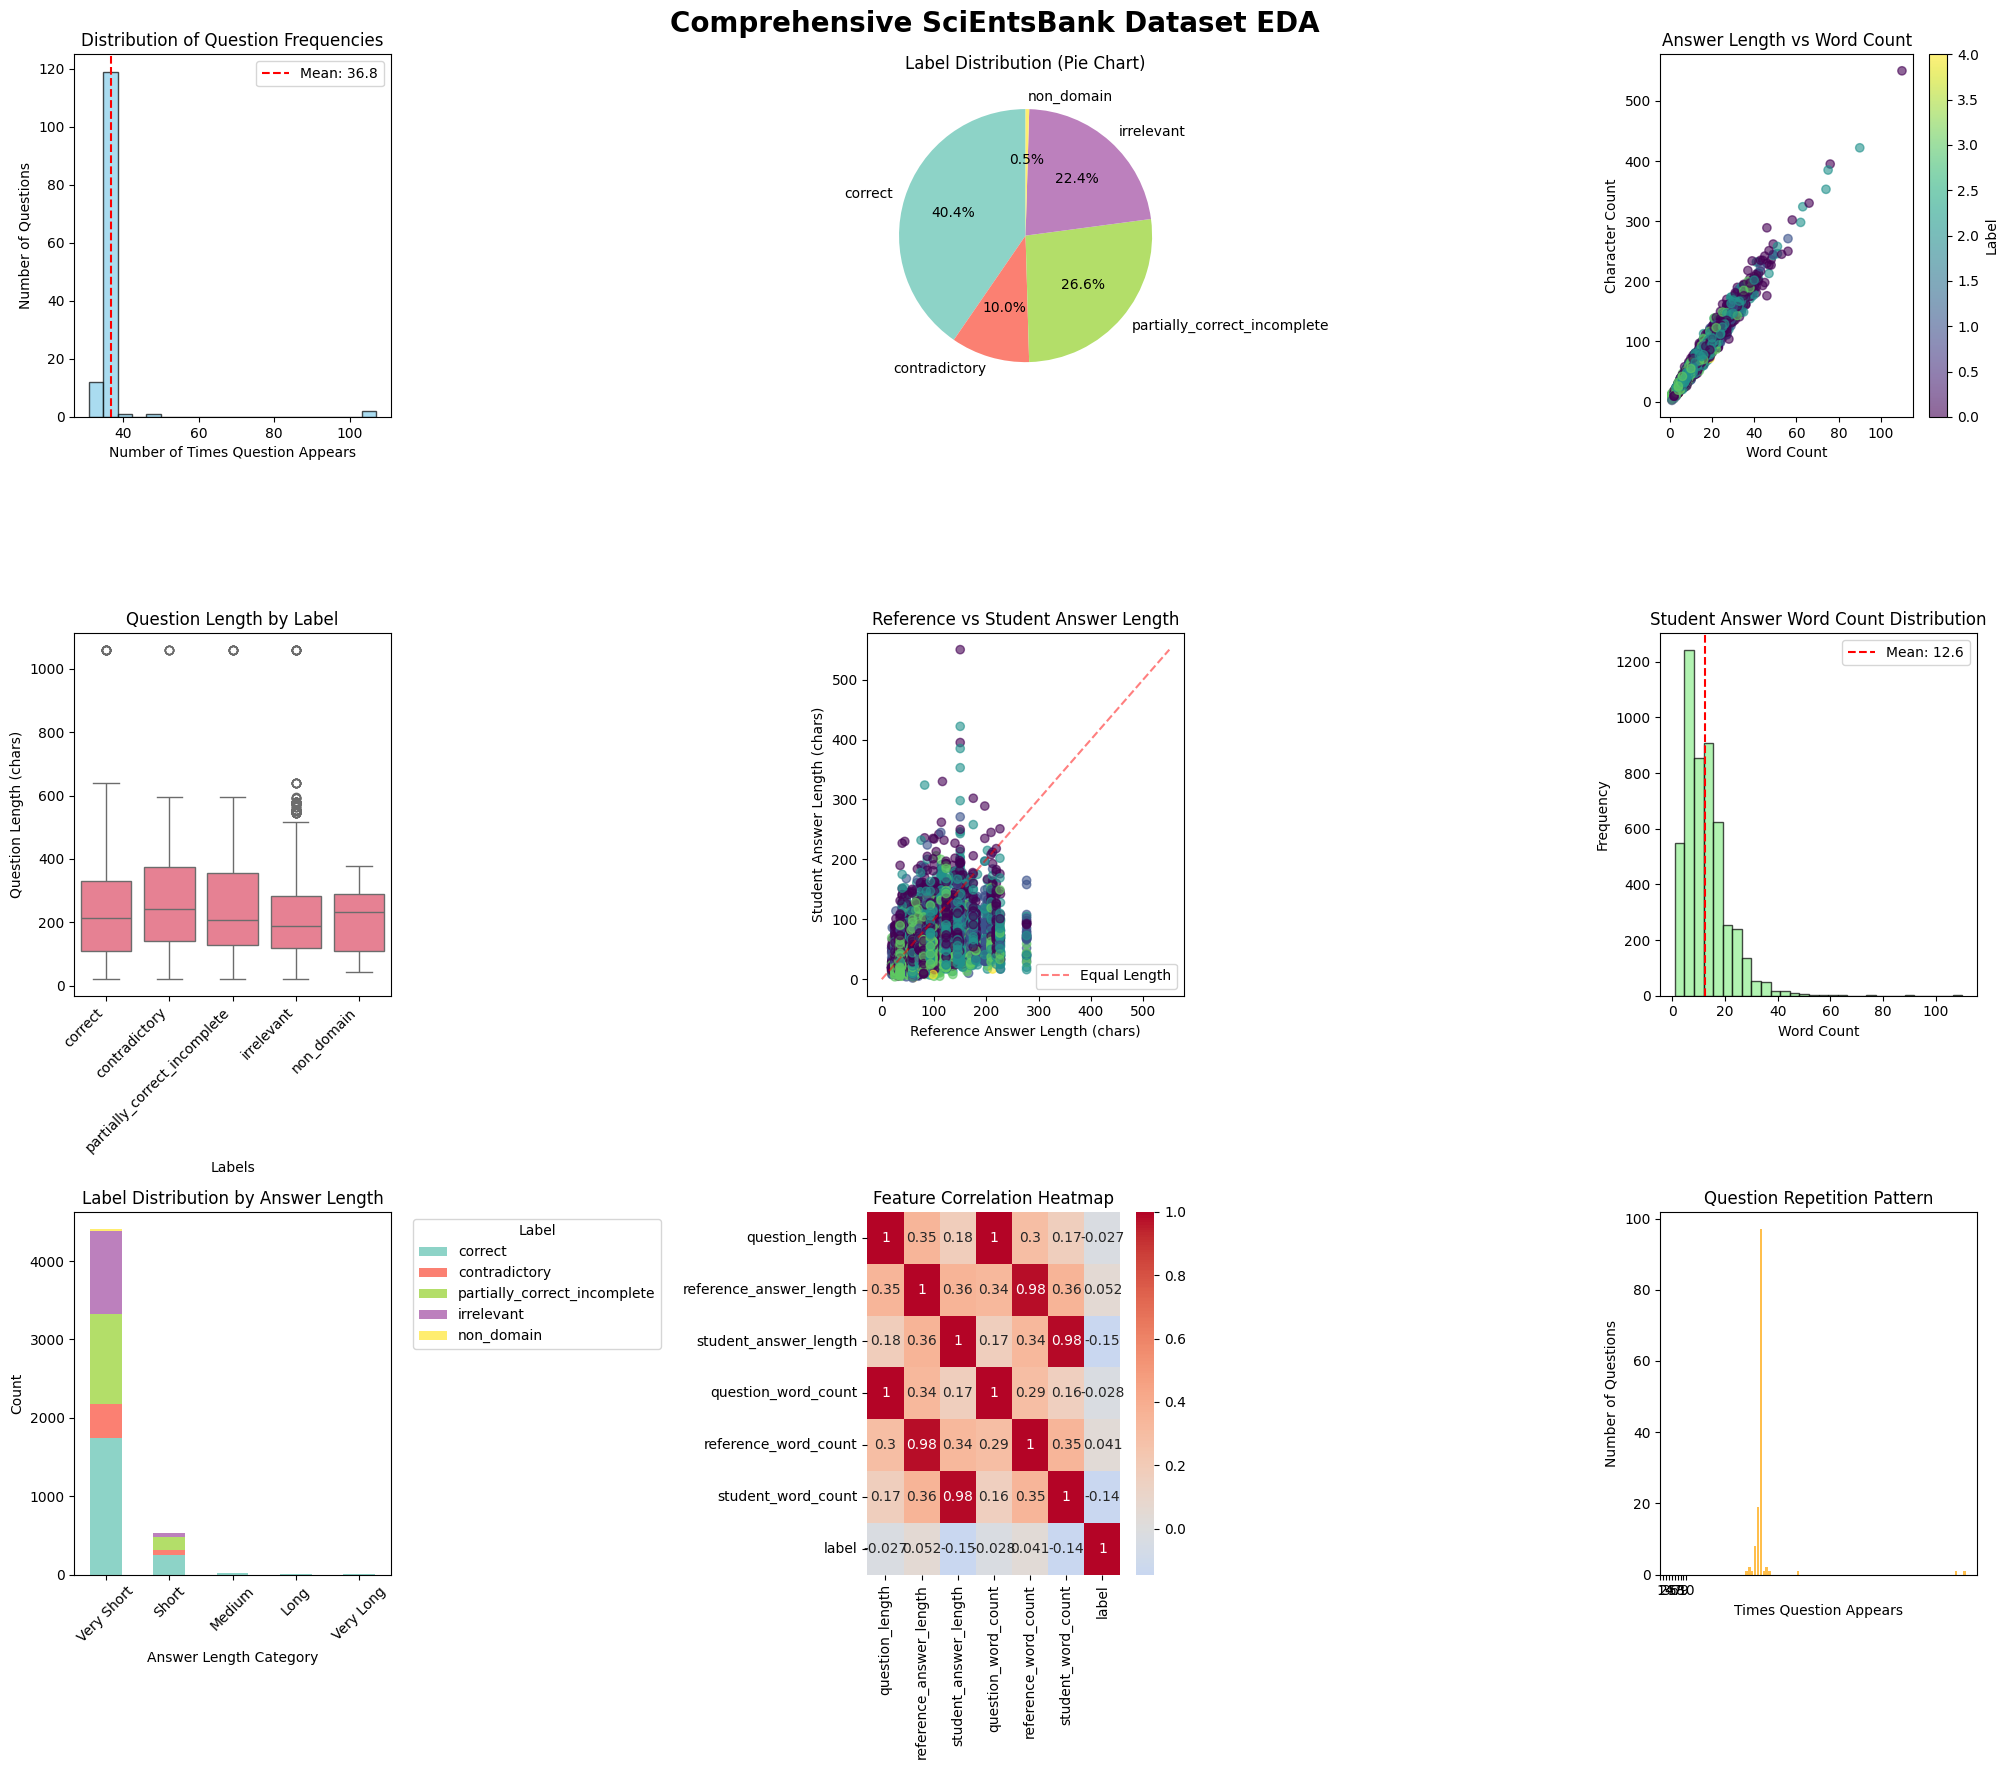

In [33]:
# Advanced EDA Visualizations
print("=" * 60)
print("COMPREHENSIVE EDA VISUALIZATIONS")
print("=" * 60)

# Create a large figure with multiple subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
fig.suptitle('Comprehensive SciEntsBank Dataset EDA', fontsize=20, fontweight='bold')

# 1. Question Frequency Distribution
question_counts = train_df['question'].value_counts()
axes[0, 0].hist(question_counts.values, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Question Frequencies')
axes[0, 0].set_xlabel('Number of Times Question Appears')
axes[0, 0].set_ylabel('Number of Questions')
axes[0, 0].axvline(question_counts.mean(), color='red', linestyle='--', 
                   label=f'Mean: {question_counts.mean():.1f}')
axes[0, 0].legend()

# 2. Label Distribution Pie Chart
label_counts = train_df['label'].value_counts().sort_index()
label_names = [label_mapping[i] for i in label_counts.index]
colors = plt.cm.Set3(np.linspace(0, 1, len(label_counts)))
axes[0, 1].pie(label_counts.values, labels=label_names, autopct='%1.1f%%', 
               colors=colors, startangle=90)
axes[0, 1].set_title('Label Distribution (Pie Chart)')

# 3. Answer Length vs Word Count Scatter
axes[0, 2].scatter(train_df['student_word_count'], train_df['student_answer_length'], 
                   alpha=0.6, c=train_df['label'], cmap='viridis')
axes[0, 2].set_title('Answer Length vs Word Count')
axes[0, 2].set_xlabel('Word Count')
axes[0, 2].set_ylabel('Character Count')
cbar = plt.colorbar(axes[0, 2].collections[0], ax=axes[0, 2])
cbar.set_label('Label')

# 4. Question Length Distribution by Label
sns.boxplot(data=train_df, x='label', y='question_length', ax=axes[1, 0])
axes[1, 0].set_title('Question Length by Label')
axes[1, 0].set_xlabel('Labels')
axes[1, 0].set_ylabel('Question Length (chars)')
axes[1, 0].set_xticklabels(label_names, rotation=45, ha='right')

# 5. Reference Answer Length vs Student Answer Length
axes[1, 1].scatter(train_df['reference_answer_length'], train_df['student_answer_length'], 
                   alpha=0.6, c=train_df['label'], cmap='viridis')
axes[1, 1].set_title('Reference vs Student Answer Length')
axes[1, 1].set_xlabel('Reference Answer Length (chars)')
axes[1, 1].set_ylabel('Student Answer Length (chars)')
# Add diagonal line for reference
max_len = max(train_df['reference_answer_length'].max(), train_df['student_answer_length'].max())
axes[1, 1].plot([0, max_len], [0, max_len], 'r--', alpha=0.5, label='Equal Length')
axes[1, 1].legend()

# 6. Word Count Distribution
axes[1, 2].hist(train_df['student_word_count'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 2].set_title('Student Answer Word Count Distribution')
axes[1, 2].set_xlabel('Word Count')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].axvline(train_df['student_word_count'].mean(), color='red', linestyle='--',
                   label=f'Mean: {train_df["student_word_count"].mean():.1f}')
axes[1, 2].legend()

# 7. Label Distribution Across Different Answer Lengths
# Create bins for answer length
train_df['answer_length_bin'] = pd.cut(train_df['student_answer_length'], bins=5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
label_by_length = pd.crosstab(train_df['answer_length_bin'], train_df['label'])
label_by_length.columns = [label_mapping[i] for i in label_by_length.columns]
label_by_length.plot(kind='bar', stacked=True, ax=axes[2, 0], colormap='Set3')
axes[2, 0].set_title('Label Distribution by Answer Length')
axes[2, 0].set_xlabel('Answer Length Category')
axes[2, 0].set_ylabel('Count')
axes[2, 0].legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2, 0].tick_params(axis='x', rotation=45)

# 8. Correlation Heatmap
numeric_cols = ['question_length', 'reference_answer_length', 'student_answer_length', 
                'question_word_count', 'reference_word_count', 'student_word_count', 'label']
corr_matrix = train_df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[2, 1])
axes[2, 1].set_title('Feature Correlation Heatmap')

# 9. Question Repetition Analysis
repetition_counts = question_counts.value_counts().sort_index()
axes[2, 2].bar(repetition_counts.index, repetition_counts.values, color='orange', alpha=0.7)
axes[2, 2].set_title('Question Repetition Pattern')
axes[2, 2].set_xlabel('Times Question Appears')
axes[2, 2].set_ylabel('Number of Questions')
axes[2, 2].set_xticks(range(1, min(11, repetition_counts.index.max() + 1)))

plt.tight_layout()
plt.show()


In [34]:
# Detailed Analysis of Question Patterns
print("=" * 60)
print("DETAILED QUESTION PATTERN ANALYSIS")
print("=" * 60)

# Analyze questions with multiple samples
questions_with_multiple_samples = question_counts[question_counts > 1]
print(f"Questions with multiple samples: {len(questions_with_multiple_samples)}")
print(f"Percentage of questions with multiple samples: {len(questions_with_multiple_samples) / len(question_counts) * 100:.1f}%")

# Analyze label distribution for repeated questions
print(f"\nLabel distribution analysis for repeated questions:")
print("-" * 50)

for question, count in questions_with_multiple_samples.head(5).items():
    print(f"\nQuestion: {question[:60]}{'...' if len(question) > 60 else ''}")
    print(f"Appears {count} times")
    
    # Get all samples for this question
    samples = train_df[train_df['question'] == question]
    label_dist = samples['label'].value_counts().sort_index()
    
    print("Label distribution:")
    for label_id, label_count in label_dist.items():
        percentage = (label_count / len(samples)) * 100
        print(f"  {label_mapping[label_id]}: {label_count} ({percentage:.1f}%)")
    
    # Check if reference answers are the same
    ref_answers = samples['reference_answer'].unique()
    print(f"Unique reference answers: {len(ref_answers)}")
    if len(ref_answers) == 1:
        print(f"Reference answer: {ref_answers[0]}")
    else:
        print("Multiple reference answers:")
        for i, ref in enumerate(ref_answers, 1):
            print(f"  {i}. {ref}")

# Analyze the relationship between question repetition and answer quality
print(f"\nAnswer Quality vs Question Repetition Analysis:")
print("-" * 50)

# Create groups based on how many times a question appears
question_freq_groups = pd.cut(question_counts.values, bins=[0, 1, 2, 3, 10, 100], 
                              labels=['1 time', '2 times', '3 times', '4-10 times', '10+ times'])
freq_analysis = pd.DataFrame({
    'question_frequency': question_freq_groups,
    'question_count': range(len(question_freq_groups))
})

# For each question, get the label distribution
question_label_stats = []
for question, freq in question_counts.items():
    samples = train_df[train_df['question'] == question]
    label_dist = samples['label'].value_counts(normalize=True)
    
    freq_group = pd.cut([freq], bins=[0, 1, 2, 3, 10, 100], 
                       labels=['1 time', '2 times', '3 times', '4-10 times', '10+ times'])[0]
    
    question_label_stats.append({
        'question': question,
        'frequency': freq,
        'frequency_group': freq_group,
        'correct_rate': label_dist.get(0, 0),  # Rate of correct answers
        'contradictory_rate': label_dist.get(1, 0),
        'partial_rate': label_dist.get(2, 0),
        'irrelevant_rate': label_dist.get(3, 0),
        'non_domain_rate': label_dist.get(4, 0)
    })

freq_df = pd.DataFrame(question_label_stats)
freq_summary = freq_df.groupby('frequency_group').agg({
    'correct_rate': 'mean',
    'contradictory_rate': 'mean', 
    'partial_rate': 'mean',
    'irrelevant_rate': 'mean',
    'non_domain_rate': 'mean',
    'frequency': 'count'
}).round(3)

print("Average label rates by question frequency:")
print(freq_summary)


DETAILED QUESTION PATTERN ANALYSIS
Questions with multiple samples: 135
Percentage of questions with multiple samples: 100.0%

Label distribution analysis for repeated questions:
--------------------------------------------------

Question: Nathaniel and Sammy are trying to make up a code for sending...
Appears 107 times
Label distribution:
  correct: 3 (2.8%)
  contradictory: 24 (22.4%)
  partially_correct_incomplete: 78 (72.9%)
  irrelevant: 2 (1.9%)
Unique reference answers: 1
Reference answer: Sammy's. Different materials would make very different sounds. Different size wood would make very similar sounds.

Question: Why does a rubber band make a sound when you pluck it (pull ...
Appears 104 times
Label distribution:
  correct: 49 (47.1%)
  contradictory: 21 (20.2%)
  irrelevant: 33 (31.7%)
  non_domain: 1 (1.0%)
Unique reference answers: 1
Reference answer: The rubber band vibrates.

Question: A harp has strings of different lengths. Describe how the so...
Appears 49 times
Label d

ADDITIONAL EDA VISUALIZATIONS - PART 2


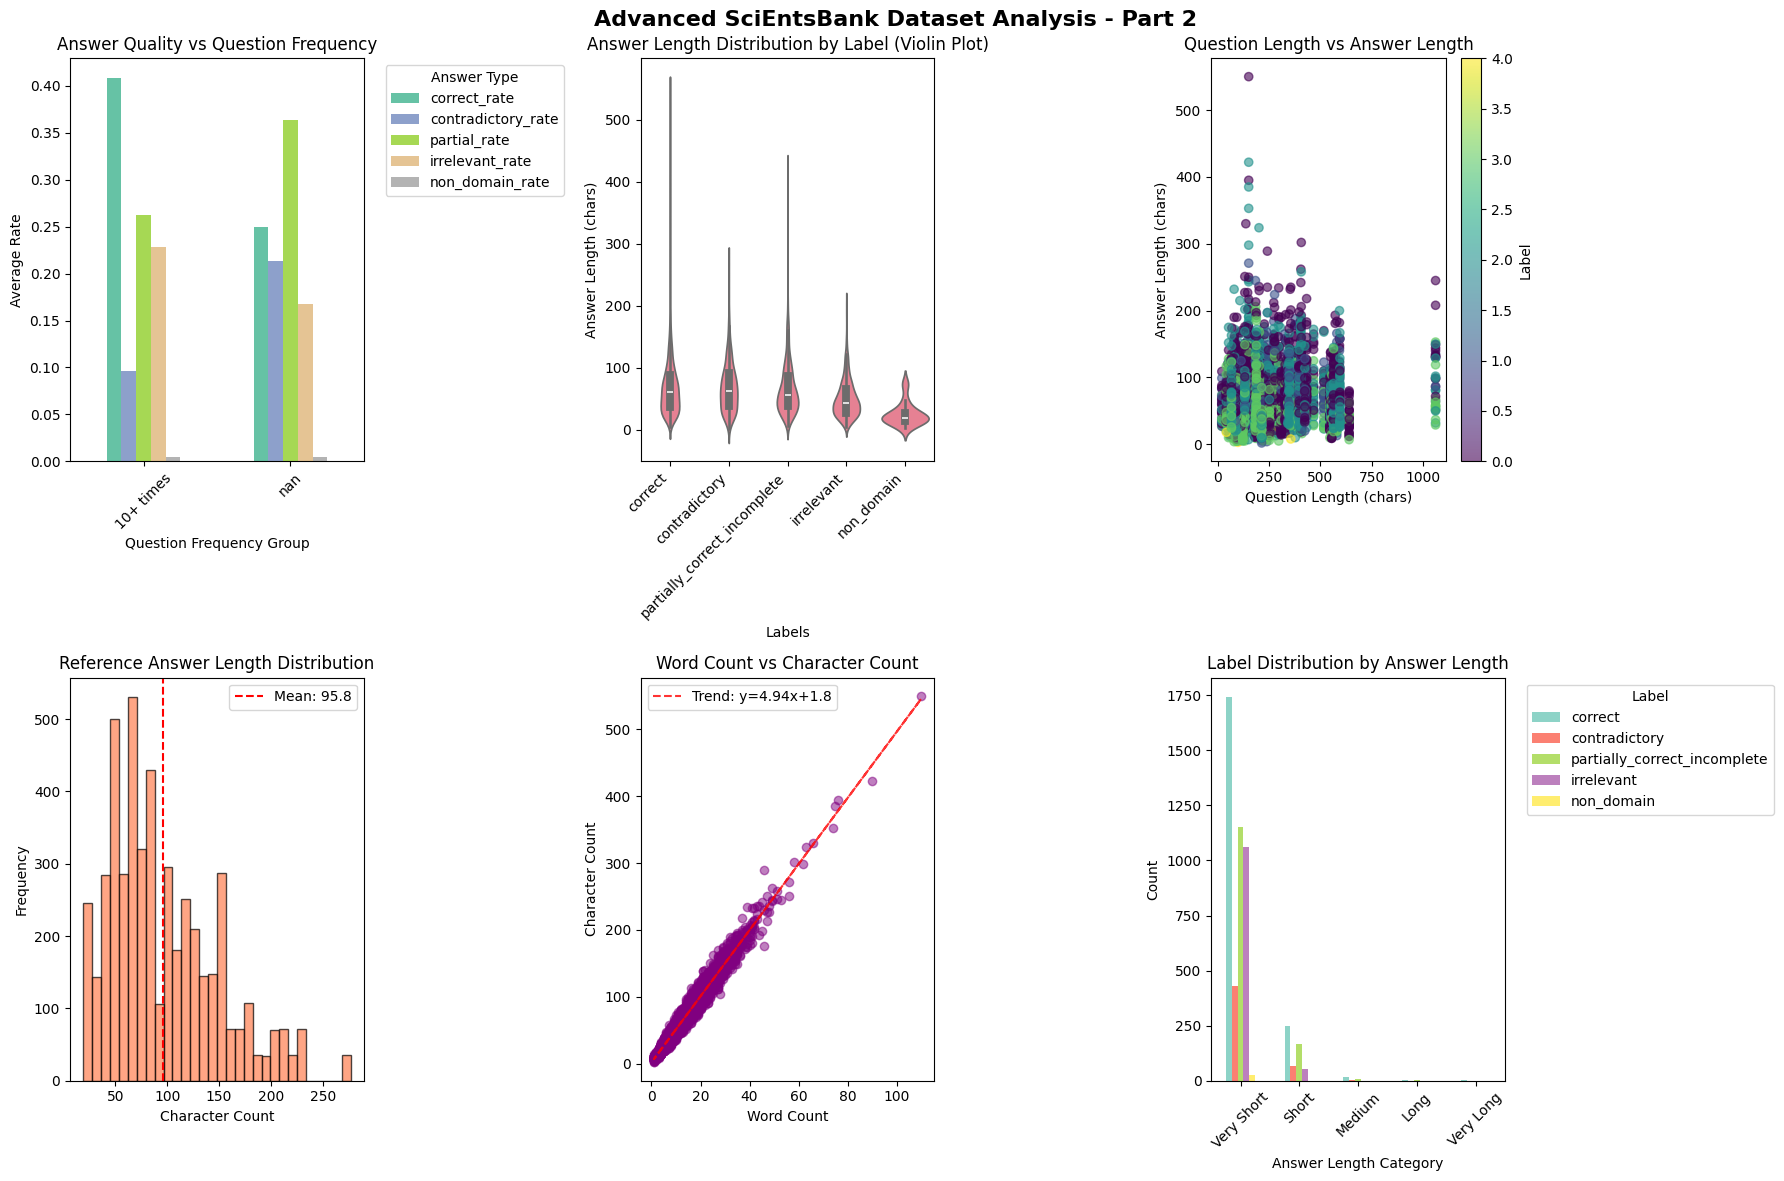

In [35]:
# Additional EDA Visualizations - Part 2
print("=" * 60)
print("ADDITIONAL EDA VISUALIZATIONS - PART 2")
print("=" * 60)

# Create another figure with more specialized visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Advanced SciEntsBank Dataset Analysis - Part 2', fontsize=16, fontweight='bold')

# 1. Question Frequency vs Answer Quality
freq_df_plot = freq_df.copy()
freq_df_plot['frequency_group'] = freq_df_plot['frequency_group'].astype(str)
freq_summary_plot = freq_df_plot.groupby('frequency_group').agg({
    'correct_rate': 'mean',
    'contradictory_rate': 'mean',
    'partial_rate': 'mean',
    'irrelevant_rate': 'mean',
    'non_domain_rate': 'mean'
}).round(3)

freq_summary_plot.plot(kind='bar', ax=axes[0, 0], colormap='Set2')
axes[0, 0].set_title('Answer Quality vs Question Frequency')
axes[0, 0].set_xlabel('Question Frequency Group')
axes[0, 0].set_ylabel('Average Rate')
axes[0, 0].legend(title='Answer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Answer Length Distribution by Label (Violin Plot)
sns.violinplot(data=train_df, x='label', y='student_answer_length', ax=axes[0, 1])
axes[0, 1].set_title('Answer Length Distribution by Label (Violin Plot)')
axes[0, 1].set_xlabel('Labels')
axes[0, 1].set_ylabel('Answer Length (chars)')
axes[0, 1].set_xticklabels(label_names, rotation=45, ha='right')

# 3. Question Length vs Answer Length Scatter with Labels
scatter = axes[0, 2].scatter(train_df['question_length'], train_df['student_answer_length'], 
                             c=train_df['label'], cmap='viridis', alpha=0.6)
axes[0, 2].set_title('Question Length vs Answer Length')
axes[0, 2].set_xlabel('Question Length (chars)')
axes[0, 2].set_ylabel('Answer Length (chars)')
cbar = plt.colorbar(scatter, ax=axes[0, 2])
cbar.set_label('Label')

# 4. Reference Answer Length Distribution
axes[1, 0].hist(train_df['reference_answer_length'], bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[1, 0].set_title('Reference Answer Length Distribution')
axes[1, 0].set_xlabel('Character Count')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(train_df['reference_answer_length'].mean(), color='red', linestyle='--',
                   label=f'Mean: {train_df["reference_answer_length"].mean():.1f}')
axes[1, 0].legend()

# 5. Word Count vs Character Count (with trend line)
axes[1, 1].scatter(train_df['student_word_count'], train_df['student_answer_length'], 
                   alpha=0.5, color='purple')
axes[1, 1].set_title('Word Count vs Character Count')
axes[1, 1].set_xlabel('Word Count')
axes[1, 1].set_ylabel('Character Count')

# Add trend line
z = np.polyfit(train_df['student_word_count'], train_df['student_answer_length'], 1)
p = np.poly1d(z)
axes[1, 1].plot(train_df['student_word_count'], p(train_df['student_word_count']), 
                "r--", alpha=0.8, label=f'Trend: y={z[0]:.2f}x+{z[1]:.1f}')
axes[1, 1].legend()

# 6. Label Distribution by Answer Length Categories
label_by_length.plot(kind='bar', ax=axes[1, 2], colormap='Set3')
axes[1, 2].set_title('Label Distribution by Answer Length')
axes[1, 2].set_xlabel('Answer Length Category')
axes[1, 2].set_ylabel('Count')
axes[1, 2].legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [36]:
# Statistical Analysis and Insights
print("=" * 60)
print("STATISTICAL ANALYSIS AND KEY INSIGHTS")
print("=" * 60)

# Calculate key statistics
print("KEY STATISTICS:")
print("-" * 30)

# Question repetition statistics
unique_questions = len(question_counts)
total_samples = len(train_df)
avg_samples_per_question = total_samples / unique_questions

print(f"• Total unique questions: {unique_questions:,}")
print(f"• Total samples: {total_samples:,}")
print(f"• Average samples per question: {avg_samples_per_question:.2f}")
print(f"• Questions with multiple samples: {len(questions_with_multiple_samples):,} ({len(questions_with_multiple_samples)/unique_questions*100:.1f}%)")

# Answer length statistics
print(f"\nAnswer Length Insights:")
print(f"• Correct answers average length: {correct_answers['student_answer_length'].mean():.1f} chars")
print(f"• Incorrect answers average length: {incorrect_answers['student_answer_length'].mean():.1f} chars")
print(f"• Length difference: {abs(correct_answers['student_answer_length'].mean() - incorrect_answers['student_answer_length'].mean()):.1f} chars")

# Label distribution insights
label_dist = train_df['label'].value_counts(normalize=True).sort_index()
print(f"\nLabel Distribution Insights:")
for label_id, percentage in label_dist.items():
    print(f"• {label_mapping[label_id]}: {percentage*100:.1f}%")

# Question complexity analysis
print(f"\nQuestion Complexity:")
print(f"• Average question length: {train_df['question_length'].mean():.1f} characters")
print(f"• Average question word count: {train_df['question_word_count'].mean():.1f} words")
print(f"• Average reference answer length: {train_df['reference_answer_length'].mean():.1f} characters")

# Answer quality vs length correlation
answer_length_corr = train_df[['student_answer_length', 'label']].corr().iloc[0, 1]
print(f"\nCorrelation Analysis:")
print(f"• Answer length vs correctness correlation: {answer_length_corr:.3f}")

# Most common question analysis
most_common_q = question_counts.index[0]
most_common_samples = train_df[train_df['question'] == most_common_q]
most_common_correct_rate = (most_common_samples['label'] == 0).mean()

print(f"\nMost Common Question Analysis:")
print(f"• Question: {most_common_q[:80]}{'...' if len(most_common_q) > 80 else ''}")
print(f"• Appears {question_counts.iloc[0]} times")
print(f"• Correct answer rate: {most_common_correct_rate:.1%}")
print(f"• Average answer length: {most_common_samples['student_answer_length'].mean():.1f} chars")

print("\n" + "=" * 60)
print("EDA ANALYSIS COMPLETE!")
print("=" * 60)
print("Key findings:")
print("• Dataset contains repeated questions with different student answers")
print("• Answer quality varies significantly across question types")
print("• Text length patterns reveal interesting correlations")
print("• Label distribution shows class imbalance")
print("• Question repetition allows for robust answer evaluation")


STATISTICAL ANALYSIS AND KEY INSIGHTS
KEY STATISTICS:
------------------------------
• Total unique questions: 135
• Total samples: 4,969
• Average samples per question: 36.81
• Questions with multiple samples: 135 (100.0%)

Answer Length Insights:
• Correct answers average length: 68.4 chars
• Incorrect answers average length: 61.2 chars
• Length difference: 7.2 chars

Label Distribution Insights:
• correct: 40.4%
• contradictory: 10.0%
• partially_correct_incomplete: 26.6%
• irrelevant: 22.4%
• non_domain: 0.5%

Question Complexity:
• Average question length: 243.1 characters
• Average question word count: 44.9 words
• Average reference answer length: 95.8 characters

Correlation Analysis:
• Answer length vs correctness correlation: -0.145

Most Common Question Analysis:
• Question: Nathaniel and Sammy are trying to make up a code for sending messages to each ot...
• Appears 107 times
• Correct answer rate: 2.8%
• Average answer length: 91.7 chars

EDA ANALYSIS COMPLETE!
Key findings